In [1]:
import random
import math
import logging
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import jpt
from jpt import (
    alex,
    ken,
    full_name,
    jeopardy_dialogue,
    jeopardy_benchmark_suite,
    evaluate_jeopardy_benchmarks
)
from util import now, TemporarySeed

In [2]:
pd.set_option('display.max_colwidth', None)

logging.basicConfig(stream=sys.stderr, level=logging.ERROR)
logger = logging.getLogger(__name__)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
jeopardy_data = jpt.load_jeopardy_dataset(remove_unfair=True)
print(len(jeopardy_data))

206407


In [5]:
random_question = random.sample(jeopardy_data, 1)[0]
random_question

{'category': 'FOOD FOR THOUGHT',
 'air_date': '2008-11-21',
 'question': "'Buzzbee is the advertising mascot for this variety of Cheerios'",
 'value': 1000.0,
 'answer': 'Honey Nut Cheerios',
 'round': 'Jeopardy!',
 'show_number': '5570'}

In [6]:
jeopardy_dialogue(random_question, contestant=ken);

Category: FOOD FOR THOUGHT
Clue: Buzzbee is the advertising mascot for this variety of Cheerios
Answer: Honey Nut Cheerios
Contestant: What is Honey Nut Cheerios?
Alex: Correct! Honey Nut Cheerios is indeed the variety associated with Buzzbee.


In [13]:
new_benchmark_results_df = jeopardy_benchmark_suite(jeopardy_data, sample_size=1_000, seed=137)


amy....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [14]:
old_benchmark_results_df = pd.read_csv(os.path.join(jpt.JEOPARDY_DATA_DIR, 'all_benchmark_results_20240510.csv'))
all_benchmark_results_df = pd.concat([old_benchmark_results_df, new_benchmark_results_df])
all_benchmark_results_df.shape

(14000, 8)

In [15]:
jeopardy_benchmark_evaluations_df = evaluate_jeopardy_benchmarks(all_benchmark_results_df)
jeopardy_benchmark_evaluations_df

,label,successes,failures,sample_size,success_rate,standard_error,name
1,ken,1924,76,2000,0.9620,0.004288,Ken Jennings\n(gpt-4-turbo)
0,amy,1856,144,2000,0.9280,0.005788,Amy Schneider\n(gpt-3.5-fine-tuned)
5,james,1791,209,2000,0.8955,0.006846,James Holzhauer\n(gpt-3.5-turbo)
4,brad,1790,210,2000,0.8950,0.006860,Brad Rutter\n(llama3:70b)
6,mattea,1748,252,2000,0.8740,0.007425,Mattea Roach\n(llama3:8b + RAG)
2,larissa,1257,743,2000,0.6285,0.010805,Larissa Kelly\n(llama3:8b)
3,david,1196,804,2000,0.5980,0.010964,David Madden\n(llama2:7b)


In [16]:
errors_df = all_benchmark_results_df[ ~all_benchmark_results_df['correct'] ]
errors_df.sample(len(errors_df)).head(10)

,label,category,question,value,answer,contestant_answer,judgement,correct
5817,james,RELIGION,"'In 1915, the Religious Society of Friends tried to make this company change its name'",100.0,Quaker Oats,What is the company name that the Religious Society of Friends tried to change in 1915 to American Friends Service Committee?,"Incorrect. The correct response was ""What is Quaker Oats?""",False
923,david,"LITERARY CROSSWORD CLUES ""S""","'The ""saint""ly Mr. Templar<br />(5)'",1200.0,Simon,Who is Sir Arthur Conan Doyle?,"Incorrect. The correct response was ""Who is Simon?""",False
4201,david,SONNETS,"'""When I consider how my light is spent"" begins this sonnet about his loss of sight'",7800.0,Milton,What is Shakespeare's Sonnet 29?,"Incorrect. The correct response is ""Who is Milton?""",False
6564,mattea,IN THE PINK,"'Rapper Cam'ron had a pink one of these alliterative super-SUVs, but sold it as it got too much attention'",800.0,Range Rover,What is an Escalade?,"Incorrect. The correct response was, ""What is a Range Rover?""",False
6265,mattea,BRITISH NOVELISTS,"'James Hilton's father, a school headmaster, was an inspiration for the title character in ""Goodbye, Mr."" him'",600.0,Chips,What is who?,"Incorrect. The correct response was ""What is Chips?""",False
4541,brad,THIS SHOULD SOUND FAMILIAR,"'Don't look now, but from the Latin for ""balcony"", it's a small platform for a public speaker'",1000.0,a podium,What is a pulpit?,"Incorrect. The correct response was ""What is a podium?""",False
6940,mattea,THE ARCTIC ENVIRONMENT,"'(<a href=""http://www.j-archive.com/media/2012-01-23_J_23.wmv"">Sarah of the Clue Crew presents the clue.</a>) After Antarctica & Greenland, many consider Nordaustland in Svalbard to be covered with the third-largest in volume of this form of slow-moving glacier'",1000.0,an icecap,What is ice?,"Incorrect. The correct response was ""What is an icecap?""",False
357,larissa,"""TRI"" HARDER",'Bet in which the bettor must correctly choose the first 3 finishers in a horse race in exact order',500.0,Trifecta,What is the Daily Double?,"Incorrect. The correct response was ""What is a trifecta?""",False
3406,larissa,"CROSSWORD CLUES ""I""","'Bliss, proverbially<br />(9)'",1600.0,ignorance,"Is the answer ""IS HAPPINESS""?","Incorrect. The correct response was ""What is ignorance?""",False
6064,mattea,RHYME TIME,'A fresh & flippant gal from Scotland',1600.0,a sassy lassie,What is a lassie?,"Incorrect. The correct response was ""What is a sassy lassie?""",False


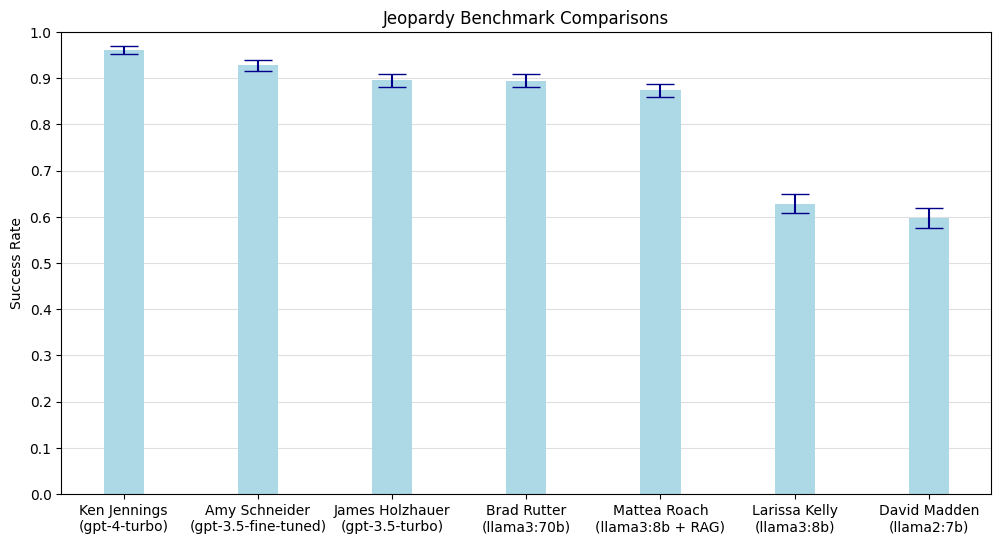

In [17]:
# Plotting the bar chart with error bars
jpt.plot_evaluations(jeopardy_benchmark_evaluations_df)

In [18]:
timestamp = now(False)
eval_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'jeopardy_benchmark_evaluations_{timestamp}.csv')
print('wrote', eval_filename)
jeopardy_benchmark_evaluations_df.to_csv(eval_filename, index=False)

benchmark_filename = os.path.join(jpt.JEOPARDY_DATA_DIR, f'all_benchmark_results_{timestamp}.csv')
all_benchmark_results_df.to_csv(benchmark_filename, index=False)
print('wrote', benchmark_filename)

wrote C:\Users\oloon\Dropbox\data\jeopardy\jeopardy_benchmark_evaluations_2024-05-11.csv
wrote C:\Users\oloon\Dropbox\data\jeopardy\all_benchmark_results_2024-05-11.csv


In [61]:
df = jeopardy_benchmark_evaluations_df.copy()
df.reset_index(drop=True, inplace=True)

# split name/model into separate columns
name_split = df['name'].str.split('\n', expand=True)
df.insert(0, 'model', name_split[1].str[1:-1])
df.insert(0, 'Contestant', name_split[0])
df.drop(columns=['label', 'name'], inplace=True)

# formatting
df['successes'] = df['successes'].apply(lambda x: f'{x:,}')
df['failures'] = df['failures'].apply(lambda x: f'{x:,}')
df['sample_size'] = df['sample_size'].apply(lambda x: f'{x:,}')
df['success_rate'] = df['success_rate'].apply(lambda p: f'{p*100:0.2f}%')
df['standard_error'] = df['standard_error'].apply(lambda p: f'±{p*196:0.2f}%')

df.columns = ['Contestant', 'Model', 'Successes', 'Failures', 'Sample Size', 'Success Rate', '95% CI']
print(df.to_markdown(index=False))

| Contestant      | Model              | Successes   |   Failures | Sample Size   | Success Rate   | 95% CI   |
|:----------------|:-------------------|:------------|-----------:|:--------------|:---------------|:---------|
| Ken Jennings    | gpt-4-turbo        | 1,924       |         76 | 2,000         | 96.20%         | ±0.84%   |
| Amy Schneider   | gpt-3.5-fine-tuned | 1,856       |        144 | 2,000         | 92.80%         | ±1.13%   |
| James Holzhauer | gpt-3.5-turbo      | 1,791       |        209 | 2,000         | 89.55%         | ±1.34%   |
| Brad Rutter     | llama3:70b         | 1,790       |        210 | 2,000         | 89.50%         | ±1.34%   |
| Mattea Roach    | llama3:8b + RAG    | 1,748       |        252 | 2,000         | 87.40%         | ±1.46%   |
| Larissa Kelly   | llama3:8b          | 1,257       |        743 | 2,000         | 62.85%         | ±2.12%   |
| David Madden    | llama2:7b          | 1,196       |        804 | 2,000         | 59.80%         | ±2.

In [62]:
87.40 - 62.85

24.550000000000004